# CNN(Convolutional Neural Network)
- Used framework: pytorch

## PyTorch Data Preprocess

In [41]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms

%matplotlib inline

### Data Loader 부르기
- PyTorch 는 DataLoader를 불러 model에 넣음

In [19]:
batch_size = 32
test_batch_size = 32

In [59]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,), std=(0.5,))
                    ])),
    batch_size=1,
    shuffle=True
)

In [21]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,), std=(0.5,))
                    ])),
    batch_size=test_batch_size,
    shuffle=True
)

In [60]:
image, label = next(iter(train_loader))
image.shape, label.shape

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

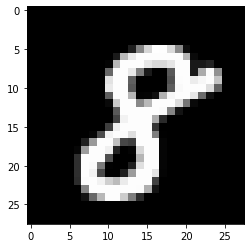

In [65]:
plt.imshow(image[0, 0, :, :], 'gray')
plt.show()

## PyTorch Layer

In [47]:
import torch.nn as nn 
import torch.nn.functional as F 

### Convolution

In [69]:
layer = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [70]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

#### detach()  는 그래프에서 잠깐 떼에서 gradient에 영향을 받지 않게 함

In [71]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

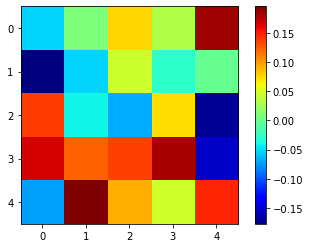

In [72]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [74]:
output_data = layer(image)
output_data = output_data.data
output = output_data.cpu().numpy()

In [75]:
output.shape

(1, 20, 24, 24)

In [77]:
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

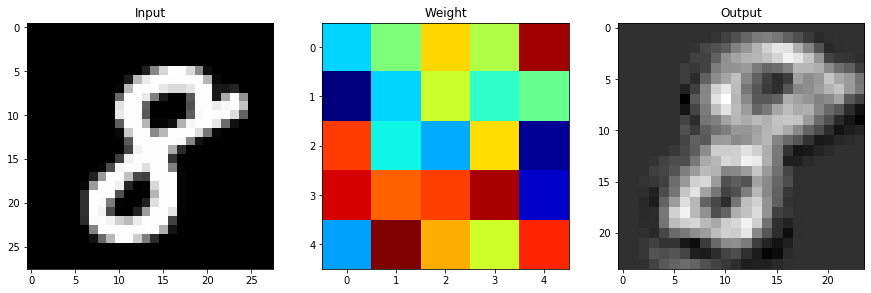

In [79]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')

### Pooling

In [ ]:
output = torch.from_numpy(output)

In [92]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

In [93]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

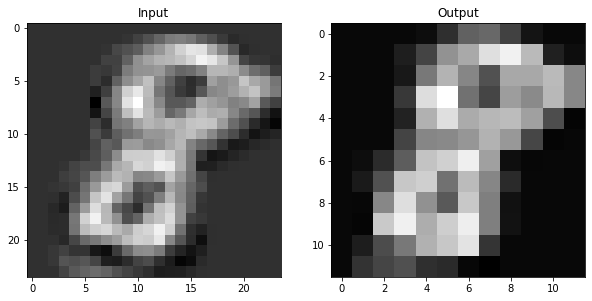

In [96]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(output[0, 0, :, :], 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear

In [97]:
pool_arr = torch.from_numpy(pool_arr)
pool_arr.shape

torch.Size([1, 20, 12, 12])

In [98]:
flatten = pool_arr.view(1, 20 * 12 * 12)
flatten.shape

torch.Size([1, 2880])

In [99]:
lin = nn.Linear(2880, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [100]:
lin

tensor([[-0.0135,  0.2503,  0.6072, -0.3552, -0.0306,  0.1685,  0.4249,  0.2537,
          0.2476,  0.2143]], grad_fn=<AddmmBackward>)

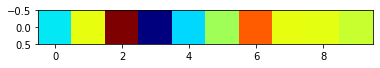

In [101]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

In [103]:
with torch.no_grad():
    flatten = pool_arr.view(1, 20 * 12 * 12)
    lin = nn.Linear(2880, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [104]:
softmax

tensor([[0.1133, 0.0706, 0.0924, 0.1406, 0.0732, 0.1074, 0.0826, 0.0929, 0.1582,
         0.0689]])

In [105]:
np.sum(softmax.numpy())

1.0